# Module 5 - Modern Portfolio Theory

In [119]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as spo
from sklearn import datasets, linear_model, metrics 

In [120]:
# To increase the size of plots

plt.rcParams['figure.figsize'] = (24*2, 13.5*2)

## Please double click on the plot image to enlarge it.

## Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [121]:
## Importing data of the M&M stocks

data = pd.read_csv('M&M.csv')
df_ = pd.DataFrame(data)
df_

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,M&amp;M,EQ,15-May-17,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27
1,M&amp;M,EQ,16-May-17,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82
2,M&amp;M,EQ,17-May-17,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89
3,M&amp;M,EQ,18-May-17,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70
4,M&amp;M,EQ,19-May-17,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20
5,M&amp;M,EQ,22-May-17,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,436797,5.739011e+08,26521,261661,59.90
6,M&amp;M,EQ,23-May-17,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,780182,1.033663e+09,40561,445992,57.17
7,M&amp;M,EQ,24-May-17,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,625683,8.221804e+08,29997,382266,61.10
8,M&amp;M,EQ,25-May-17,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,1456698,1.925708e+09,60911,1095811,75.23
9,M&amp;M,EQ,26-May-17,1327.50,1334.00,1348.90,1327.50,1341.00,1340.85,1339.17,335223,4.489200e+08,16125,156414,46.66


In [122]:
# Clearing the data

df = df_[df_.Series == 'EQ']
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27
2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82
2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89
2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70
2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20
2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,436797,5.739011e+08,26521,261661,59.90
2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,780182,1.033663e+09,40561,445992,57.17
2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,625683,8.221804e+08,29997,382266,61.10
2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,1456698,1.925708e+09,60911,1095811,75.23


In [123]:
# Calculating daily raturns in percent

df[ 'returns'] = df['Close Price'].pct_change()*100
df = df.fillna(0)
df

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,returns
Date,,,,,,,,,,,,,,,
2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27,0.000000
2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82,-0.676044
2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89,0.911187
2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70,-1.882071
2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20,-1.437706
2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,436797,5.739011e+08,26521,261661,59.90,-2.036148
2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,780182,1.033663e+09,40561,445992,57.17,1.952153
2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,625683,8.221804e+08,29997,382266,61.10,-1.734560
2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,1456698,1.925708e+09,60911,1095811,75.23,1.440416


### Calculating mean daily return of returns

In [124]:
mean_daily_returns = df['returns'].mean()
print(mean_daily_returns, '%')

-0.10787681372203915 %


### Calculating mean standard deviation of returns

In [125]:
mean_std_returns = df['returns'].std()
print(mean_std_returns, '%')

2.772515237990974 %


### Calculating annual daily return of returns

In [126]:
annual_mean = mean_daily_returns*252
print(annual_mean, '%')

-27.184957057953866 %


### Calculating volatility/annual standard deviation 

In [127]:
srt = np.sqrt(252)
annual_stdev = mean_std_returns*srt
print(annual_stdev, '%')

44.01231495516705 %


## --------------------------------------------------------------------------------------------------------------------------

# Query 5.2

Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

## Making Portfolio of:

* M&M (Large Cap) ---- Automotive Sector
* TCS (Large Cap) ---- Consultancy Sector
* IGL (Mid Cap) ---- Natural Gas Sector
* PVR (Small Cap) ---- Entertainment Sector
* BOMDYEING (Small Cap) ---- Textiles Sector


### 1. M&M (Large Cap)

In [128]:
# Importing and Sorting Data of M&M

po1 = df.copy()
po1

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,returns
Date,,,,,,,,,,,,,,,
2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27,0.000000
2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82,-0.676044
2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89,0.911187
2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70,-1.882071
2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20,-1.437706
2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,436797,5.739011e+08,26521,261661,59.90,-2.036148
2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,780182,1.033663e+09,40561,445992,57.17,1.952153
2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,625683,8.221804e+08,29997,382266,61.10,-1.734560
2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,1456698,1.925708e+09,60911,1095811,75.23,1.440416


### 2. TCS (Large Cap)

In [129]:
# Importing and Sorting Data of TCS

po2_dat = pd.read_csv('Large_Cap\TCS.csv')
po_u_2 = pd.DataFrame(po2_dat)
po2 = po_u_2[po_u_2.Series == 'EQ']
po2['Date'] = pd.to_datetime(po2['Date'])
po2 = po2.set_index('Date')
po2

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
2017-05-16,TCS,EQ,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2017-05-17,TCS,EQ,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
2017-05-18,TCS,EQ,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
2017-05-19,TCS,EQ,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
2017-05-22,TCS,EQ,2507.15,2510.00,2553.75,2510.00,2535.00,2531.35,2530.69,831970,2.105461e+09,53261,509741,61.27
2017-05-23,TCS,EQ,2531.35,2533.20,2564.15,2514.00,2523.70,2521.70,2530.49,1374298,3.477645e+09,88749,995551,72.44
2017-05-24,TCS,EQ,2521.70,2534.80,2570.00,2529.65,2567.10,2559.15,2545.01,1267274,3.225228e+09,58716,918505,72.48
2017-05-25,TCS,EQ,2559.15,2577.00,2637.55,2568.00,2615.05,2624.60,2605.40,2047047,5.333377e+09,87147,1180439,57.67


In [130]:
# Calculating returns for TCS

po2['returns'] = po2['Close Price'].pct_change()*100
po2 = po2.fillna(0)
po2

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,returns
Date,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,0.000000
2017-05-16,TCS,EQ,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2.708131
2017-05-17,TCS,EQ,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,1.078567
2017-05-18,TCS,EQ,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20,3.292810
2017-05-19,TCS,EQ,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94,-1.145414
2017-05-22,TCS,EQ,2507.15,2510.00,2553.75,2510.00,2535.00,2531.35,2530.69,831970,2.105461e+09,53261,509741,61.27,0.965239
2017-05-23,TCS,EQ,2531.35,2533.20,2564.15,2514.00,2523.70,2521.70,2530.49,1374298,3.477645e+09,88749,995551,72.44,-0.381220
2017-05-24,TCS,EQ,2521.70,2534.80,2570.00,2529.65,2567.10,2559.15,2545.01,1267274,3.225228e+09,58716,918505,72.48,1.485109
2017-05-25,TCS,EQ,2559.15,2577.00,2637.55,2568.00,2615.05,2624.60,2605.40,2047047,5.333377e+09,87147,1180439,57.67,2.557490


### 3. IGL (Mid Cap)

In [131]:
# Importing and Sorting Data of IGL

po3_dat = pd.read_csv('Mid_Cap\IGL.csv')
po_u_3 = pd.DataFrame(po3_dat)
po3 = po_u_3[po_u_3.Series == 'EQ']
po3['Date'] = pd.to_datetime(po3['Date'])
po3 = po3.set_index('Date')
po3


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,IGL,EQ,994.50,995.10,1008.00,995.10,1002.00,1000.25,1001.54,314597,3.150804e+08,6153,172367,54.79
2017-05-16,IGL,EQ,1000.25,1007.60,1009.00,988.50,1006.00,1005.80,998.30,178249,1.779454e+08,10293,71551,40.14
2017-05-17,IGL,EQ,1005.80,1009.00,1027.00,1008.90,1019.65,1019.10,1020.26,337329,3.441626e+08,12173,123163,36.51
2017-05-18,IGL,EQ,1019.10,1019.10,1019.10,999.10,1000.05,1002.55,1008.46,168584,1.700101e+08,5294,62676,37.18
2017-05-19,IGL,EQ,1002.55,1005.00,1010.85,993.00,1002.60,1000.15,1001.42,149678,1.498905e+08,5053,38134,25.48
2017-05-22,IGL,EQ,1000.15,1002.00,1007.55,979.30,995.00,987.20,987.27,263534,2.601797e+08,10908,115685,43.90
2017-05-23,IGL,EQ,987.20,988.50,995.50,966.80,980.85,981.45,981.17,350503,3.439020e+08,8861,112562,32.11
2017-05-24,IGL,EQ,981.45,981.45,988.90,971.20,980.00,982.65,980.94,295155,2.895294e+08,6138,162414,55.03
2017-05-25,IGL,EQ,982.65,990.70,992.60,967.80,992.60,984.45,982.31,475055,4.666520e+08,8189,231162,48.66


In [132]:
# Calculating returns for IGL

po3['returns'] = po3['Close Price'].pct_change()*100
po3 = po3.fillna(0)
po3

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,returns
Date,,,,,,,,,,,,,,,
2017-05-15,IGL,EQ,994.50,995.10,1008.00,995.10,1002.00,1000.25,1001.54,314597,3.150804e+08,6153,172367,54.79,0.000000
2017-05-16,IGL,EQ,1000.25,1007.60,1009.00,988.50,1006.00,1005.80,998.30,178249,1.779454e+08,10293,71551,40.14,0.554861
2017-05-17,IGL,EQ,1005.80,1009.00,1027.00,1008.90,1019.65,1019.10,1020.26,337329,3.441626e+08,12173,123163,36.51,1.322330
2017-05-18,IGL,EQ,1019.10,1019.10,1019.10,999.10,1000.05,1002.55,1008.46,168584,1.700101e+08,5294,62676,37.18,-1.623982
2017-05-19,IGL,EQ,1002.55,1005.00,1010.85,993.00,1002.60,1000.15,1001.42,149678,1.498905e+08,5053,38134,25.48,-0.239390
2017-05-22,IGL,EQ,1000.15,1002.00,1007.55,979.30,995.00,987.20,987.27,263534,2.601797e+08,10908,115685,43.90,-1.294806
2017-05-23,IGL,EQ,987.20,988.50,995.50,966.80,980.85,981.45,981.17,350503,3.439020e+08,8861,112562,32.11,-0.582455
2017-05-24,IGL,EQ,981.45,981.45,988.90,971.20,980.00,982.65,980.94,295155,2.895294e+08,6138,162414,55.03,0.122268
2017-05-25,IGL,EQ,982.65,990.70,992.60,967.80,992.60,984.45,982.31,475055,4.666520e+08,8189,231162,48.66,0.183178


### 4. PVR (Small Cap)

In [133]:
# Importing and Sorting Data of PVR

po4_dat = pd.read_csv('Small_Cap\PVR.csv')
po_u_4 = pd.DataFrame(po4_dat)
po4 = po_u_4[po_u_4.Series == 'EQ']
po4['Date'] = pd.to_datetime(po4['Date'])
po4 = po4.set_index('Date')
po4

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,PVR,EQ,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58
2017-05-16,PVR,EQ,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09
2017-05-17,PVR,EQ,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83
2017-05-18,PVR,EQ,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24
2017-05-19,PVR,EQ,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67
2017-05-22,PVR,EQ,1513.55,1498.45,1522.00,1397.05,1492.00,1481.00,1473.33,449726,6.625967e+08,29357,179657,39.95
2017-05-23,PVR,EQ,1481.00,1492.00,1515.00,1445.50,1497.00,1496.45,1476.70,318619,4.705033e+08,9260,179663,56.39
2017-05-24,PVR,EQ,1496.45,1490.00,1530.05,1444.15,1452.00,1450.00,1484.30,107642,1.597726e+08,5923,33688,31.30
2017-05-25,PVR,EQ,1450.00,1450.00,1474.75,1439.05,1474.75,1461.15,1456.94,114328,1.665689e+08,3930,53461,46.76


In [134]:
# Calculating returns for PVR

po4['returns'] = po4['Close Price'].pct_change()*100
po4 = po4.fillna(0)
po4

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,returns
Date,,,,,,,,,,,,,,,
2017-05-15,PVR,EQ,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58,0.000000
2017-05-16,PVR,EQ,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09,0.921342
2017-05-17,PVR,EQ,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83,-0.565302
2017-05-18,PVR,EQ,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24,-0.996537
2017-05-19,PVR,EQ,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67,-0.099007
2017-05-22,PVR,EQ,1513.55,1498.45,1522.00,1397.05,1492.00,1481.00,1473.33,449726,6.625967e+08,29357,179657,39.95,-2.150573
2017-05-23,PVR,EQ,1481.00,1492.00,1515.00,1445.50,1497.00,1496.45,1476.70,318619,4.705033e+08,9260,179663,56.39,1.043214
2017-05-24,PVR,EQ,1496.45,1490.00,1530.05,1444.15,1452.00,1450.00,1484.30,107642,1.597726e+08,5923,33688,31.30,-3.104013
2017-05-25,PVR,EQ,1450.00,1450.00,1474.75,1439.05,1474.75,1461.15,1456.94,114328,1.665689e+08,3930,53461,46.76,0.768966


### 5. BOMDYEING (Small Cap)

In [135]:
# Importing and Sorting Data of IDFC

po5_dat = pd.read_csv('Small_Cap\BOMDYEING.csv')
po_u_5 = pd.DataFrame(po5_dat)
po5 = po_u_5[po_u_5.Series == 'EQ']
po5['Date'] = pd.to_datetime(po5['Date'])
po5 = po5.set_index('Date')
po5

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,BOMDYEING,EQ,83.00,83.15,83.75,81.90,82.15,82.20,82.57,1553427,1.282609e+08,8074,479867,30.89
2017-05-16,BOMDYEING,EQ,82.20,81.90,84.00,81.75,83.80,83.40,82.88,2149649,1.781606e+08,9804,561852,26.14
2017-05-17,BOMDYEING,EQ,83.40,82.55,83.80,82.05,82.25,82.25,82.71,1267468,1.048354e+08,7220,395417,31.20
2017-05-18,BOMDYEING,EQ,82.25,80.85,81.85,78.55,78.90,78.95,80.30,1156424,9.286568e+07,7001,538431,46.56
2017-05-19,BOMDYEING,EQ,78.95,79.75,80.35,76.35,77.30,77.15,78.07,1444416,1.127716e+08,7588,518874,35.92
2017-05-22,BOMDYEING,EQ,77.15,76.50,77.55,73.65,74.00,74.00,75.88,1104857,8.383221e+07,7459,418671,37.89
2017-05-23,BOMDYEING,EQ,74.00,73.50,74.25,68.50,70.10,70.45,70.86,1943788,1.377326e+08,9539,545391,28.06
2017-05-24,BOMDYEING,EQ,70.45,68.65,70.15,66.30,67.30,66.95,68.15,1897802,1.293304e+08,9297,700948,36.93
2017-05-25,BOMDYEING,EQ,66.95,67.85,70.45,67.50,70.20,69.85,68.98,1161153,8.010034e+07,7276,386944,33.32


In [136]:
# Calculating returns for BOMDYEING

po5['returns'] = po5['Close Price'].pct_change()*100
po5 = po5.fillna(0)
po5

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,returns
Date,,,,,,,,,,,,,,,
2017-05-15,BOMDYEING,EQ,83.00,83.15,83.75,81.90,82.15,82.20,82.57,1553427,1.282609e+08,8074,479867,30.89,0.000000
2017-05-16,BOMDYEING,EQ,82.20,81.90,84.00,81.75,83.80,83.40,82.88,2149649,1.781606e+08,9804,561852,26.14,1.459854
2017-05-17,BOMDYEING,EQ,83.40,82.55,83.80,82.05,82.25,82.25,82.71,1267468,1.048354e+08,7220,395417,31.20,-1.378897
2017-05-18,BOMDYEING,EQ,82.25,80.85,81.85,78.55,78.90,78.95,80.30,1156424,9.286568e+07,7001,538431,46.56,-4.012158
2017-05-19,BOMDYEING,EQ,78.95,79.75,80.35,76.35,77.30,77.15,78.07,1444416,1.127716e+08,7588,518874,35.92,-2.279924
2017-05-22,BOMDYEING,EQ,77.15,76.50,77.55,73.65,74.00,74.00,75.88,1104857,8.383221e+07,7459,418671,37.89,-4.082955
2017-05-23,BOMDYEING,EQ,74.00,73.50,74.25,68.50,70.10,70.45,70.86,1943788,1.377326e+08,9539,545391,28.06,-4.797297
2017-05-24,BOMDYEING,EQ,70.45,68.65,70.15,66.30,67.30,66.95,68.15,1897802,1.293304e+08,9297,700948,36.93,-4.968062
2017-05-25,BOMDYEING,EQ,66.95,67.85,70.45,67.50,70.20,69.85,68.98,1161153,8.010034e+07,7276,386944,33.32,4.331591


### Calculating Annual Return for entire Portfolio

In [137]:
po1_mean = po1['returns'].mean()
po2_mean = po2['returns'].mean()
po3_mean = po3['returns'].mean()
po4_mean = po4['returns'].mean()
po5_mean = po5['returns'].mean()

In [138]:
po1_annual = po1_mean*252
po2_annual = po2_mean*252
po3_annual = po3_mean*252
po4_annual = po4_mean*252
po5_annual = po5_mean*252

print('M&M -->',po1_annual, '%')
print('TCS -->',po2_annual, '%')
print('IGL -->',po3_annual, '%')
print('PVR -->',po4_annual, '%')
print('BOMDYEING -->',po5_annual, '%')

M&M --> -27.184957057953866 %
TCS --> 7.487510110608468 %
IGL --> -15.818353700290487 %
PVR --> 11.086480124052583 %
BOMDYEING --> 51.152898213018474 %


In [139]:
portfolio_annual_return = po1_annual*0.2 + po2_annual*0.2 + po3_annual*0.2 + po4_annual*0.2 + po5_annual*0.2
print(portfolio_annual_return, '%')

5.344715537887035 %


### Calculating Annual Volatility for entire Portfolio

In [140]:
po1_std = po1['returns'].std()
po2_std = po2['returns'].std()
po3_std = po3['returns'].std()
po4_std = po4['returns'].std()
po5_std = po5['returns'].std()

In [141]:
srt = np.sqrt(252)

po1_volatility = po1_std*srt
po2_volatility = po2_std*srt
po3_volatility = po3_std*srt
po4_volatility = po4_std*srt
po5_volatility = po5_std*srt

print('M&M -->',po1_volatility, '%')
print('TCS -->',po2_volatility, '%')
print('IGL -->',po3_volatility, '%')
print('PVR -->',po4_volatility, '%')
print('BOMDYEING -->',po5_volatility, '%')

M&M --> 44.01231495516705 %
TCS --> 43.11792083680477 %
IGL --> 64.79468498533852 %
PVR --> 30.988350413773226 %
BOMDYEING --> 74.21594274659405 %


In [142]:
portfolio_volatility = po1_volatility*0.2 + po2_volatility*0.2 + po3_volatility*0.2 + po4_volatility*0.2 + po5_volatility*0.2
print(portfolio_volatility, '%')

51.42584278753553 %


### Portfolio Annual Return --> 5.344715537887035 %
### Portfolio Volatility --> 51.42584278753553 %

## ---------------------------------------------------------------------------------------------------------------------------

# Query 5.3

Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [143]:
date = np.array(po1.index)
date

array(['2017-05-15T00:00:00.000000000', '2017-05-16T00:00:00.000000000',
       '2017-05-17T00:00:00.000000000', '2017-05-18T00:00:00.000000000',
       '2017-05-19T00:00:00.000000000', '2017-05-22T00:00:00.000000000',
       '2017-05-23T00:00:00.000000000', '2017-05-24T00:00:00.000000000',
       '2017-05-25T00:00:00.000000000', '2017-05-26T00:00:00.000000000',
       '2017-05-29T00:00:00.000000000', '2017-05-30T00:00:00.000000000',
       '2017-05-31T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-06-02T00:00:00.000000000', '2017-06-05T00:00:00.000000000',
       '2017-06-06T00:00:00.000000000', '2017-06-07T00:00:00.000000000',
       '2017-06-08T00:00:00.000000000', '2017-06-09T00:00:00.000000000',
       '2017-06-12T00:00:00.000000000', '2017-06-13T00:00:00.000000000',
       '2017-06-14T00:00:00.000000000', '2017-06-15T00:00:00.000000000',
       '2017-06-16T00:00:00.000000000', '2017-06-19T00:00:00.000000000',
       '2017-06-20T00:00:00.000000000', '2017-06-21

In [144]:
table = pd.DataFrame({'Date':date, 'M&M': po1['Close Price'], 'TCS':po2['Close Price'], 'IGL':po3['Close Price'],
                     'PVR':po4['Close Price'], 'BOMDYEING':po5['Close Price']})
table['Date'] = pd.to_datetime(table['Date'])
table = table.set_index('Date')
table

,M&M,TCS,IGL,PVR,BOMDYEING
Date,,,,,
2017-05-15,1375.65,2365.10,1000.25,1524.95,82.20
2017-05-16,1366.35,2429.15,1005.80,1539.00,83.40
2017-05-17,1378.80,2455.35,1019.10,1530.30,82.25
2017-05-18,1352.85,2536.20,1002.55,1515.05,78.95
2017-05-19,1333.40,2507.15,1000.15,1513.55,77.15
2017-05-22,1306.25,2531.35,987.20,1481.00,74.00
2017-05-23,1331.75,2521.70,981.45,1496.45,70.45
2017-05-24,1308.65,2559.15,982.65,1450.00,66.95
2017-05-25,1327.50,2624.60,984.45,1461.15,69.85


### Plotting the Scatter Plot Data

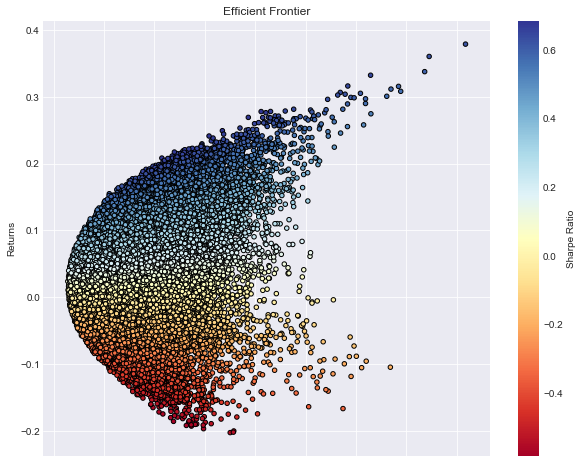

In [145]:
# calculating daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
selected = ['M&M', 'TCS', 'IGL', 'PVR', 'BOMDYEING']
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)


# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlBu', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.show()

# Query 5.4

Mark the 2 portfolios where -  
* Portfolio 1 - The Sharpe ratio is the highest  
* Portfolio 2 - The volatility is the lowest.   

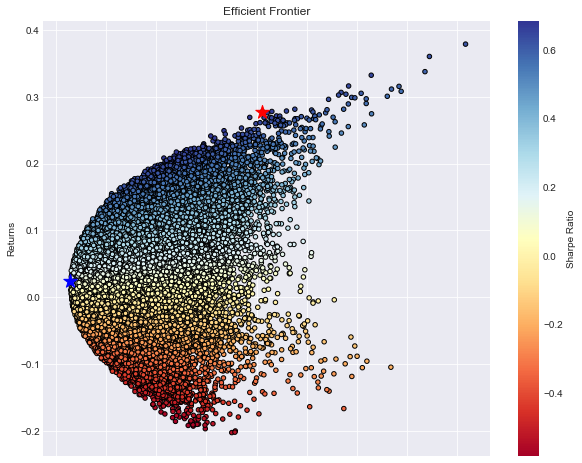

In [146]:
# finding min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlBu', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='*', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='*', s=200 )
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.show()

# -------------------------------------***THE END***----------------------------------------